CAM 논문: [Learning Deep Features for Discriminative Localization](https://arxiv.org/pdf/1512.04150.pdf)

CAM의 구조는 아래처럼 Conv layer와 GAP, FC layer로 구성된다.

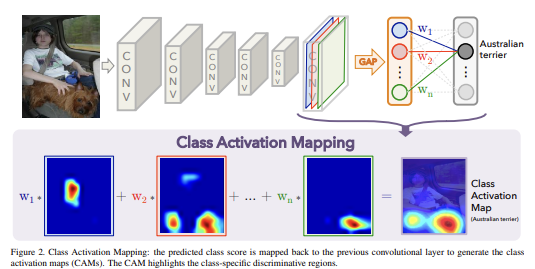

기본적인 CNN 구조는 특징을 추출하는 Convolutional layer와 추출된 특징을 이용해 이미지를 분류하는 FC layer로 구성된다.<br>
이때 Conv Layer에서 생성된 마지막 feature map을 FC layer에 전달하기 위해서 1차원 벡터로 만들어 줘야 하므로 **위치 정보가 소실된다.**
<br>
이때 해당 논문은 위와 같은 문제를 해결하기 위해 **Global Average Pooling(GAP)**를 제안한다. <br>
feature map을 GAP layer에 거치면 모든 원소들의 평균을 출력으로 반환한다. <br>
이후 해당 값들에 알맞은 가중치를 곱해서 각 클래스의 점수를 계산한다. <br>
그리고 해당 점수들을 SoftMax 함수에 통과시켜 각 클래스로 분류될 확률을 계산한다.


<h3> <strong> Global Average Pooling </strong> </h3>

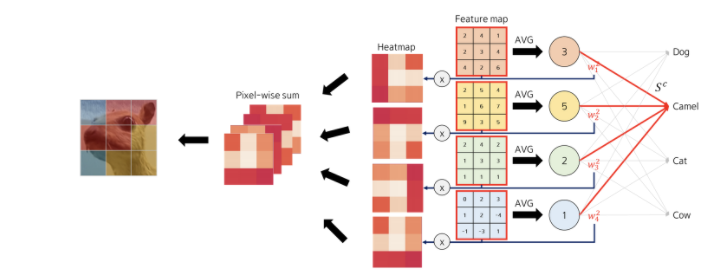

GAP layer는 맨 마지막 feature map 들의 모든 값의 평균을 출력으로 반환한다. <br>
즉, **feature map의 개수만큼 출력값을 반환**하게 된다. <br>

GAP의 출력값들은 이후 FC layer로 이동하게 되고 어떤 클래스에 속하는지 예측한다.

이때 각 클래스에 대한 CAM 이미지는 아래와 같은 수식으로 계산할 수 있다.

> $CAM = Σ_kw_k^cf_k(i,\,j)$

이때 c는 클래스, k는 각 feature map의 번호이다. <br>
또한 f()는 하나의 feature map을 의미한다.

즉, 각 feature map에 해당하는 가중치를 곱해서 heatmap을 만들고 해당 heatmap들을 pixel-wise sum해서 하나의 heatmap으로 만든다. <br>
이때 나온 heatmap을 CAM이라고 부른다.

<h3> <strong> Result </strong> </h3>

결과적으로 아래와 모델이 해당 이미지를 임의의 클래스로 분류할 때 어디를 중점적으로 보았는지 확인할 수 있었다고 한다. 

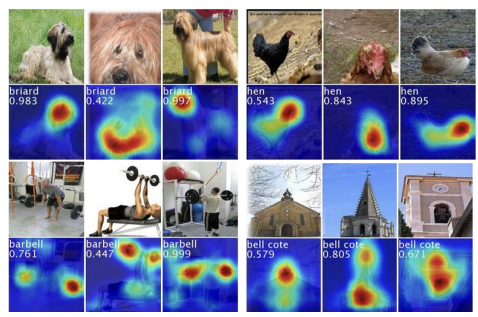

CAM은 위처럼 마지막 layer를 FC layer에서 GAP layer로 바꿔 overfitting을 줄이고 이미지의 어느 곳을 중점적으로 봤는지 시각화가 가능하다는 장점을 가진다. <br>
하지만 GAP로 대체하는 과정에서 모델의 complecity를 줄이게 되었고, 마지막 layer가 FC layer인 모델에만 한정적으로 적용된다는 단점이 존재한다.